# 1. Read daily stocks data

In [10]:
# Import pandas as pd
import pandas as pd

# Read the cryptocurrencies data stored in a csv file 
daily_stocks_data = pd.read_csv('stocks_data_2010_2020.csv', index_col = 0)

# Set the index to datetime 
daily_stocks_data.index = pd.to_datetime(daily_stocks_data.index)
daily_stocks_data.head()

,Amazon,Apple,Walmart,Micron,Bank of America,Coca-Cola,Boeing,American Express
Date,,,,,,,,
2009-12-31,6.492372,134.520004,34.291534,41.856789,13.179974,18.804321,10.56,40.802689
2010-01-04,6.593426,133.899994,34.630035,43.441975,13.731325,18.817513,10.85,41.398109
2010-01-05,6.604825,134.690002,34.553879,44.864773,14.177655,18.589882,11.17,40.985886
2010-01-06,6.499768,132.250000,35.112431,46.225727,14.343938,18.583282,11.22,40.894283
2010-01-07,6.487752,130.000000,35.681915,48.097031,14.816527,18.537094,10.84,40.917183


# 2. Convert daily to monthly data

In [13]:
# Convert daily to monthly frequency
monthly_stocks_data = daily_stocks_data.asfreq('M')

# Drop NaN values
monthly_stocks_data = monthly_stocks_data.dropna()
monthly_stocks_data.head()

,Amazon,Apple,Walmart,Micron,Bank of America,Coca-Cola,Boeing,American Express
Date,,,,,,,,
2009-12-31,6.492372,134.520004,34.291534,41.856789,13.179974,18.804321,10.56,40.802689
2010-03-31,7.240106,135.770004,35.222775,56.530022,15.631181,18.443974,10.37,42.683178
2010-04-30,8.043912,137.100006,39.371647,56.389893,15.613656,17.924196,9.35,41.178520
2010-06-30,7.749377,109.260002,34.043896,49.137108,12.591907,17.094294,8.49,37.116917
2010-08-31,7.489662,124.830002,34.189678,48.159416,10.918247,19.058840,6.46,38.941193


# 3. Calculate monthly returns 

In [14]:
# Calculate monthly percentage change
monthly_percent_change = monthly_stocks_data.pct_change()

# Drop NaN values
monthly_percent_change = monthly_percent_change.dropna()
monthly_percent_change.head()

,Amazon,Apple,Walmart,Micron,Bank of America,Coca-Cola,Boeing,American Express
Date,,,,,,,,
2010-03-31,0.115171,0.009292,0.027157,0.350558,0.185980,-0.019163,-0.017992,0.046087
2010-04-30,0.111021,0.009796,0.117789,-0.002479,-0.001121,-0.028181,-0.098361,-0.035252
2010-06-30,-0.036616,-0.203063,-0.135319,-0.128619,-0.193532,-0.046301,-0.091979,-0.098634
2010-08-31,-0.033514,0.142504,0.004282,-0.019897,-0.132915,0.114924,-0.239105,0.049149
2010-09-30,0.167215,0.258191,0.054176,0.088500,0.052209,0.063233,0.116099,0.067411


# 4. Calculate portfolio returns 

In [15]:
# Calculate portfolio returns
portfolio_returns = monthly_percent_change.mean(axis=1)

# Calculate cumulative portfolio returns
cum_portfolio_returns = (portfolio_returns+1).cumprod()

# 5. Plot cumulative portfolio returns 

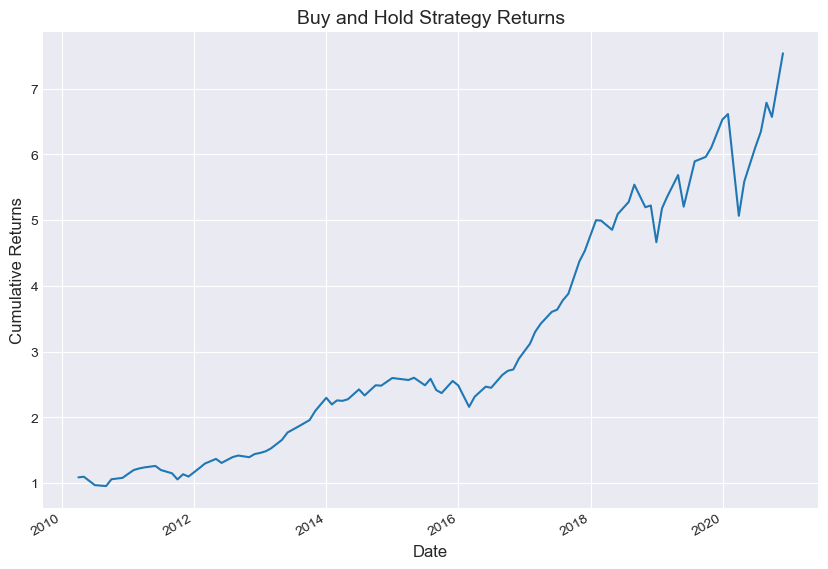

In [16]:
# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Plot cumulative strategy returns
cum_portfolio_returns.plot(figsize=(10, 7))

# Set title and labels for the plot
plt.title('Buy and Hold Strategy Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.show()

As it can be seen from the graph, the strategy performs well over 10 years.